In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
digits = pd.read_csv ("../datasets/train.csv")
test = pd.read_csv ("../datasets/test.csv")

## First step is to convert the data into arrays

In [2]:
#Separate out the outcome variable
labels=digits.label
#Drop the label column to enable conversion of 784 column dataset into 28 x 28 array
digits_1=digits.drop(['label'], axis=1)
digits_2=np.array(digits_1)
#Test dataset is already 784 columns
test_1=np.array(test)

## Tune the KNN classifier hyperparameters with grid search

In [32]:
from sklearn import cross_validation, grid_search

params={'n_neighbors': list (range(1,10)), 'weights':['distance']}
kf = cross_validation.KFold(len(digits), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)

gs.fit(digits_2, labels)
print (gs.grid_scores_)
print (gs.best_estimator_)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.96617, std: 0.00189, params: {'n_neighbors': 1, 'weights': 'distance'}, mean: 0.96617, std: 0.00189, params: {'n_neighbors': 2, 'weights': 'distance'}, mean: 0.96774, std: 0.00264, params: {'n_neighbors': 3, 'weights': 'distance'}, mean: 0.96905, std: 0.00247, params: {'n_neighbors': 4, 'weights': 'distance'}, mean: 0.96688, std: 0.00264, params: {'n_neighbors': 5, 'weights': 'distance'}, mean: 0.96771, std: 0.00226, params: {'n_neighbors': 6, 'weights': 'distance'}, mean: 0.96598, std: 0.00237, params: {'n_neighbors': 7, 'weights': 'distance'}, mean: 0.96645, std: 0.00207, params: {'n_neighbors': 8, 'weights': 'distance'}, mean: 0.96462, std: 0.00232, params: {'n_neighbors': 9, 'weights': 'distance'}]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')


## Train the KNN classifier with the training dataset (X=digits_2, y=labels)

In [33]:
from sklearn import neighbors, metrics
knn = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
knn.fit(digits_2,labels)
print (knn.predict(digits_2))
print (knn.score(digits_2, labels))

[1 0 1 ..., 7 6 9]
1.0


## Run the model on the test dataset

In [34]:
predictions=knn.predict(test_1)

In [6]:
print (knn.predict(test_1))

[2 0 9 ..., 3 9 2]


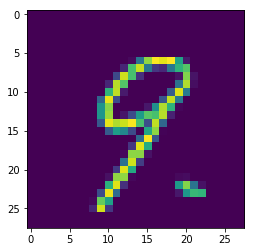

In [15]:
plt.imshow(test_1[2].reshape((28, 28)))

In [36]:
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()

## The Results

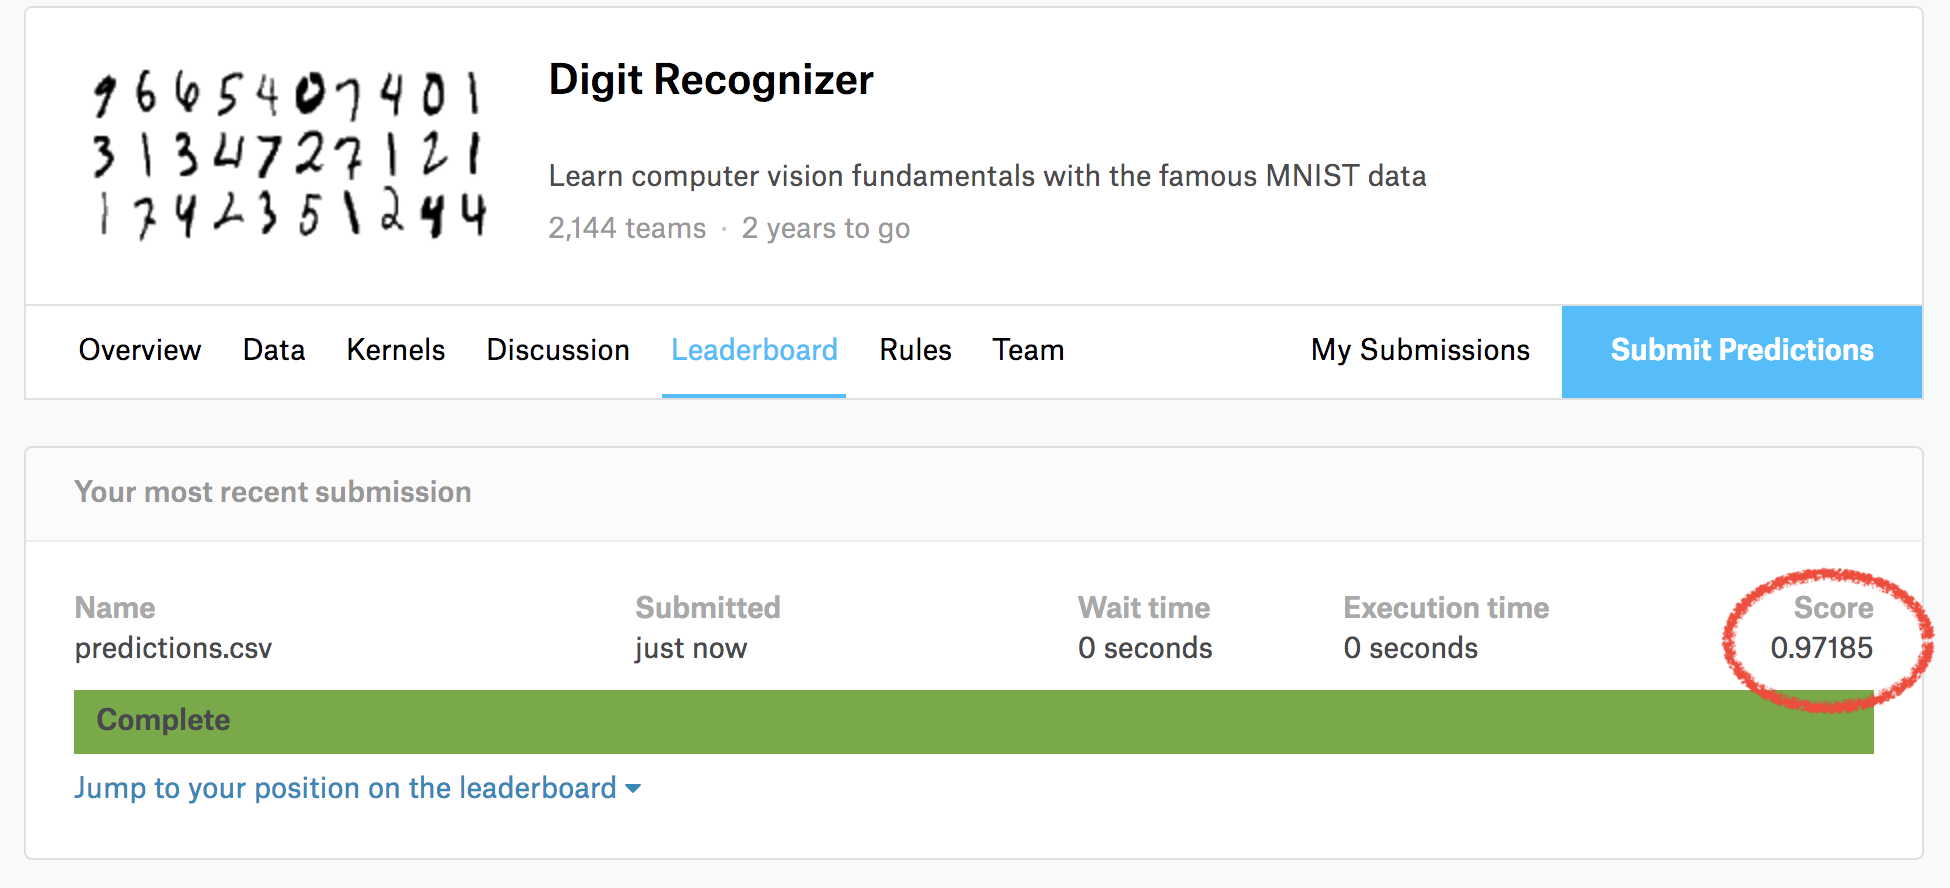

In [37]:
from IPython.display import Image
Image(filename='Screenshot_Digit_Recognition_Results.png') 